<a href="https://colab.research.google.com/github/shreyashpu1/PW-Skills-Assignments/blob/main/07_EDA_%26_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundations of Machine Learning and EDA

Question 1: What is the difference between AI, ML, DL, and Data Science? Provide a
brief explanation of each. (Hint: Compare their scope, techniques, and applications for each.)
- AI is the goal of creating intelligent systems, ML is how machines learn from data, DL is advanced ML using neural networks, and Data Science focuses on analyzing data to drive decisions.
  1. Artificial Intelligence (AI)
  - Scope
    - Broad field focused on creating systems that mimic human intelligence.
    - AI is the umbrella field that includes ML and DL.
  - Techniques
    - Rule-based systems
    - Search algorithms
    - Machine learning
    - Natural language processing
  - Applications
    - Chatbots
    - Robotics
    - Game playing
    - Expert systems

  2. Machine Learning (ML)
  - Scope
    - Subset of AI where systems learn from data without being explicitly programmed.
    - ML allows machines to learn patterns from data.
  - Techniques
    - Linear regression
    - Decision trees
    - Support Vector Machines
    - K-means clustering
  - Applications
    - Recommendation systems
    - Fraud detection
    - Spam filtering

  3. Deep Learning (DL)
  - Scope
    - Subset of ML that uses neural networks with many layers.
    - DL works best with large datasets and high computational power.
  - Techniques
    - Artificial Neural Networks
    - CNNs
    - RNNs / LSTMs
  - Applications
    - Image recognition
    - Speech recognition
    - Autonomous vehicles

  4. Data Science
  - Scope
    - Interdisciplinary field focused on extracting insights from data.
    - Data Science turns raw data into actionable insights.
  - Techniques
    - Data cleaning
    - Statistical analysis
    - Machine learning
    - Data visualization
  - Applications
    - Business analytics
    - Forecasting
    - Decision support


Question 2: Explain overfitting and underfitting in ML. How can you detect and prevent
them? (Hint: Discuss bias-variance tradeoff, cross-validation, and regularization techniques.)
- Overfitting
  - Overfitting occurs when a model learns the training data too well, including noise.
  - It performs very well on training data but poorly on unseen data.
  - Characteristics : Low training error, High validation/test error, High variance
- Underfitting
  - Underfitting occurs when a model is too simple to capture the underlying pattern in data.
  - It performs poorly on both training and test data.
  - Characteristics : High training error, High validation/test error, High bias

- Detecting Overfitting & Underfitting
    - Compare training and validation performance
      - Large gap - Overfitting
      - Both poor - Underfitting
    - Cross-validation
      - Checks model stability across multiple data splits

- Preventing Overfitting
  - Use cross-validation
  - Apply regularization (L1, L2)
  - Reduce model complexity
  - Use more training data

- Preventing Underfitting
  - Increase model complexity
  - Add more relevant features
  - Reduce regularization
  - Train for more epochs

Question 3: How would you handle missing values in a dataset? Explain at least three
methods with examples. (Hint: Consider deletion, mean/median imputation, and predictive modeling.)
- Row Deletion
  - Remove rows that contain missing values.
  - Used when missing data is very small and data is missing completely at random (MCAR)
  - Example : df.dropna()
  - Pros
    - Simple to implement
    - No assumptions introduced
  - Cons
    - Data loss
    - Can bias results if missingness is not random
- Mean / Median / Mode Imputation
  1. Mean Imputation
    - Replace missing values with the mean of the column.
    - Used for numerical data with no strong outliers.
    - Example:
        `df['age'].fillna(df['age'].mean(), inplace=True)`
  2. Median Imputation
    - Replace missing values with the median of the column.
    - Used for numerical data with outliers.
    - Example:
      `df['salary'].fillna(df['salary'].median(), inplace=True)`
  3. Mode Imputation
    - Replace missing values with the mode of the column.
    - Used for categorical data.
    - Example:
      `df['salary'].fillna(df['salary'].mode(), inplace=True)`
  - Pros
    - Simple and fast
    - Preserves dataset size
  - Cons
    - Reduces variance
    - Can distort data distribution
-  Predictive Modeling Imputation
  - Use ML models to predict missing values based on other features.
  - Examples
    - Linear regression
    - KNN imputation
      ```python
      from sklearn.impute import KNNImputer
      imputer = KNNImputer(n_neighbors=5)
      df_imputed = imputer.fit_transform(df)
        ```
  - Pros
    - More accurate
    - Preserves relationships between features
  - Cons
    - Computationally expensive
    - Complex to implement

Question 4: What is an imbalanced dataset? Describe two techniques to handle it
(theoretical + practical - Hint: Discuss SMOTE, Random Under/Oversampling, and class weights in models).
- An imbalanced dataset is one where one class significantly outnumbers the others.
- Common in fraud detection, medical diagnosis, spam detection.
- Example: 98% non-fraud, 2% fraud - imbalanced
- Models become biased toward the majority class
  
- Technique 1: Random Under-Sampling / Over-Sampling
  - A) Random Under-Sampling
    - Reduce samples from the majority class.
    - Practical Example
      ```python
      from imblearn.under_sampling import RandomUnderSampler

      rus = RandomUnderSampler(random_state=42)
      X_res, y_res = rus.fit_resample(X, y)
      ```
  - B) Random Over-Sampling
    - Duplicate samples from the minority class.
    - Practical Example
      ```python
      from imblearn.over_sampling import RandomOverSampler

      ros = RandomOverSampler(random_state=42)
      X_res, y_res = ros.fit_resample(X, y)
      ```
- Technique 2: SMOTE (Synthetic Minority Over-sampling Technique)
  - Generates synthetic samples instead of duplicating existing ones.
  - Creates new data points by interpolating between minority class neighbors.
  - Practical Example
      ```python
      from imblearn.over_sampling import SMOTE

      smote = SMOTE(random_state=42)
      X_res, y_res = smote.fit_resample(X, y)
      ```
- Technique 3: Class Weights (Model-Level Approach)
  - Assign higher penalty to misclassifying minority class.
  - Model learns to treat minority class as more important.
  - Practical Example
      ```python
      from sklearn.linear_model import LogisticRegression

      model = LogisticRegression(class_weight='balanced')
      model.fit(X_train, y_train)
      ```

Question 5: Why is feature scaling important in ML? Compare Min-Max scaling and
Standardization. (Hint: Explain impact on distance-based algorithms (e.g., KNN, SVM) and gradient descent.)
- Feature scaling ensures that all features contribute equally to a model by bringing them to a common scale.
- Importance:
  - Many ML algorithms use distance calculations.
  - Features with larger values can dominate the model.
  - Improves training speed and convergence in gradient-based algorithms.
- Impact on Algorithms
  1. Distance-Based Algorithms
    - KNN, K-Means, SVM
    - Distances (Euclidean, Manhattan) are sensitive to scale.
    - Without scaling, features with larger ranges overpower smaller ones.
  2. Gradient Descent Algorithms
    - Linear Regression, Logistic Regression, Neural Networks
    - Scaling helps gradients converge faster and more stably.
    - Prevents zig-zagging during optimization.

- Min-Max Scaling
  - Rescales features to a fixed range, usually [0, 1].
  - Formula:
𝑋𝑠𝑐𝑎𝑙𝑒𝑑 = (𝑋 − 𝑋𝑚𝑖𝑛) / (𝑋𝑚𝑎𝑥 − 𝑋𝑚𝑖𝑛)

  - Characteristics
    - Preserves original distribution
    - Sensitive to outliers
  - Used when
    - Data has fixed bounds
    - Image processing
    - Neural networks
    - Example
      ```python
      from sklearn.preprocessing import MinMaxScaler

      scaler = MinMaxScaler()
      X_scaled = scaler.fit_transform(X)
      ```
- Standardization (Z-Score Scaling)
  - Transforms data to have mean = 0 and standard deviation = 1.
  - Formula:
𝑋𝑠𝑐𝑎𝑙𝑒𝑑 = (𝑋 − 𝜇) / 𝜎

  - Characteristics
    - Less affected by outliers
    - Produces negative and positive values
    - Used when
      - Algorithms assuming normal distribution
      - Linear regression, SVM, PCA
    - Example
      ```python
      from sklearn.preprocessing import StandardScaler

      scaler = StandardScaler()
      X_scaled = scaler.fit_transform(X)
      ```


Question 6: Compare Label Encoding and One-Hot Encoding. When would you prefer
one over the other? (Hint: Consider categorical variables with ordinal vs. nominal relationships.)

- 1) Label Encoding
  - Assigns a unique integer to each category.
  - Best for Ordinal categorical variables (where order matters)
  - Use when Categories have a meaningful order.
  - Examples:
    - Education level → High School < Bachelor < Master < PhD
    - Ratings → Low < Medium < High
  - Pros
    - Simple and memory-efficient
    - Maintains order for ordinal data
  - Cons
    - Introduces false order for nominal data
    - Distance between labels may mislead models
  - Practical Example
    ```python
    from sklearn.preprocessing import LabelEncoder

    le = LabelEncoder()
    df['education'] = le.fit_transform(df['education'])
    ```
- 2. One-Hot Encoding
  - Creates binary columns for each category.
  - Best For Nominal categorical variables (no inherent order)
  - Use when Categories are independent and unordered
  - Examples: City names, Colors, Gender
  - Pros
    - No false ordering
    - Works well with most ML algorithms
  - Cons
    - Increases dimensionality
    - Can cause sparsity with many categories
  - Practical Example
    ```python
    from sklearn.preprocessing import OneHotEncoder

    encoder = OneHotEncoder(sparse=False)
    encoded = encoder.fit_transform(df[['color']])
    ```

Question 7: Google Play Store Dataset
- Analyze the relationship between app categories and ratings. Which categories have the highest/lowest average ratings, and what could be the possible reasons?
- Dataset: https://github.com/MasteriNeuron/datasets.git

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/MasteriNeuron/datasets/main/googleplaystore.csv'
df = pd.read_csv(url)

df.Rating.value_counts()
#19.0 seems to be a outlier as we already know ratings ranges from 1-5.

,count
Rating,
4.4,1109
4.3,1076
4.5,1038
4.2,952
4.6,823
4.1,708
4.0,568
4.7,499
3.9,386


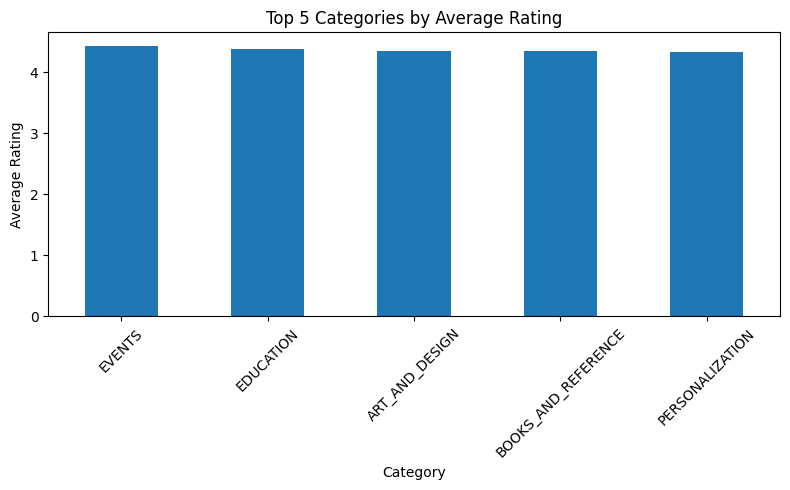

In [ ]:
df_clean = df[
    (df['Rating'] >= 1) &
    (df['Rating'] <= 5)
]

category_avg_rating = (
    df_clean
    .groupby('Category')['Rating']
    .mean()
    .sort_values(ascending=False)
)

top_5 = category_avg_rating.head(5)

plt.figure(figsize=(8, 5))
top_5.plot(kind='bar')
plt.title("Top 5 Categories by Average Rating")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


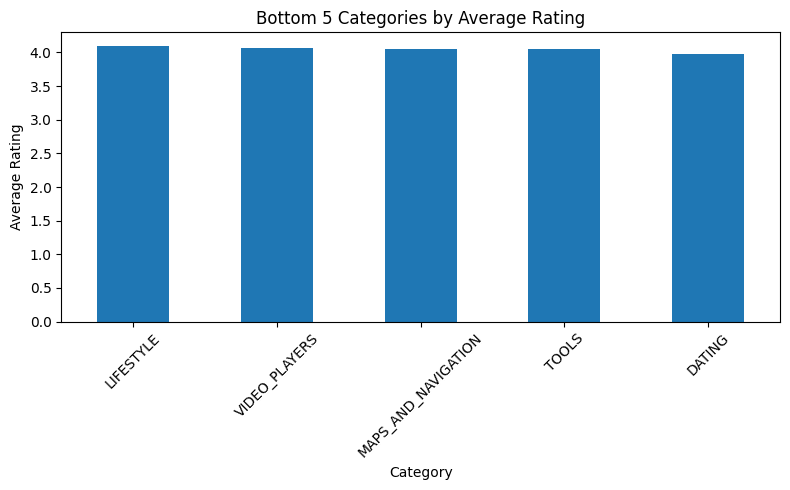

In [ ]:
bottom_5 = category_avg_rating.tail(5)

plt.figure(figsize=(8, 5))
bottom_5.plot(kind='bar')
plt.title("Bottom 5 Categories by Average Rating")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. Top-rated categories: EVENTS, EDUCATION, ART_AND_DESIGN, BOOKS_AND_REFERENCE, PERSONALIZATION
- Possible reasons:
  - Apps are purpose-driven (learning, reference)
  - Users have clear expectations, so satisfaction is easier to meet
  - Lower competition → less comparison
  - Fewer ads and monetization pressure
  - Users rate based on usefulness, not entertainment
2. Low-rated categories: LIFESTYLE, VIDEO_PLAYERS, MAPS_AND_NAVIGATION, TOOLS, DATING
- Possible reasons:
  - Very high competition → users compare apps aggressively
  - Frequent ads, subscriptions, and in-app purchases
  - Performance issues (lags, crashes)
  - Entertainment apps are judged emotionally


Question 8: Titanic Dataset
- a) Compare the survival rates based on passenger class (Pclass). Which class had the highest survival rate, and why do you think that happened?
- b) Analyze how age (Age) affected survival. Group passengers into children (Age < 18) and adults (Age ≥ 18). Did children have a better chance of survival?
Dataset: https://github.com/MasteriNeuron/datasets.git


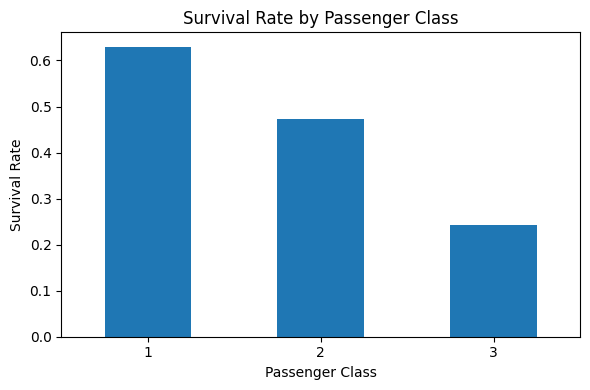

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/main/titanic.csv"
df = pd.read_csv(url)

df.Survived.value_counts()
df.Pclass.value_counts()
#data need not be processed

pclass_survival = (
    df.groupby('Pclass')['Survived']
    .mean()
)

plt.figure(figsize=(6, 4))
pclass_survival.plot(kind='bar')
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


a) Survival Rate vs Passenger Class (Pclass)
- Survival rates differed significantly across passenger classes.
- Survival trend
  - 1st Class (Pclass = 1) – Highest survival rate
  - 2nd Class (Pclass = 2) – Moderate survival rate
  - 3rd Class (Pclass = 3) – Lowest survival rate
- Key reasons:
  - Priority evacuation: “Women and children first” was enforced more effectively in upper classes.
  - Cabin location: 1st-class cabins were closer to lifeboats (upper decks).
  - Socio-economic advantage: Crew assistance and access to information favored higher classes
  - Less crowding: 3rd class had overcrowding and delayed access to decks

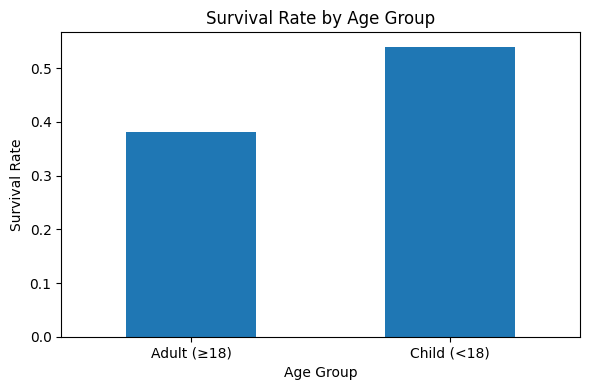

In [ ]:
df_age = df.dropna(subset=['Age']).copy()

df_age['AgeGroup'] = df_age['Age'].apply(
    lambda x: 'Child (<18)' if x < 18 else 'Adult (≥18)'
)

agegroup_survival = (
    df_age.groupby('AgeGroup')['Survived']
    .mean()
)

plt.figure(figsize=(6, 4))
agegroup_survival.plot(kind='bar')
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



b) Survival Analysis Based on Age (Children vs Adults)
- Children had a higher survival rate than adults
- Key Reasons:
  - Evacuation rule: “Women and children first”
  - Crew actively prioritized saving children
  - Families often stayed together
  - Children were physically easier to assist into lifeboats

Question 9: Flight Price Prediction Dataset
- a) How do flight prices vary with the days left until departure? Identify any exponential price
surges and recommend the best booking window.
- b)Compare prices across airlines for the same route (e.g., Delhi-Mumbai). Which airlines are
consistently cheaper/premium, and why?
- Dataset: https://github.com/MasteriNeuron/datasets.git

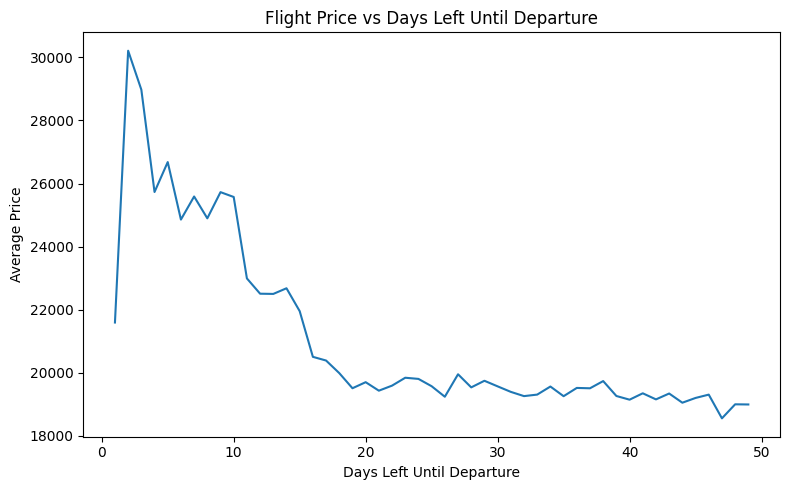

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/main/flight_price.csv"
df = pd.read_csv(url)

df.days_left.value_counts()
df.price.value_counts()

price_by_days = (
    df.groupby('days_left')['price']
    .mean()
    .sort_index()
)

plt.figure(figsize=(8, 5))
plt.plot(price_by_days.index, price_by_days.values)
plt.title("Flight Price vs Days Left Until Departure")
plt.xlabel("Days Left Until Departure")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()

- Prices increase rapidly in the last 7–10 days
- This surge is not linear, but steep (yield-management pricing)
- Best time to book: 30–45 days before departure

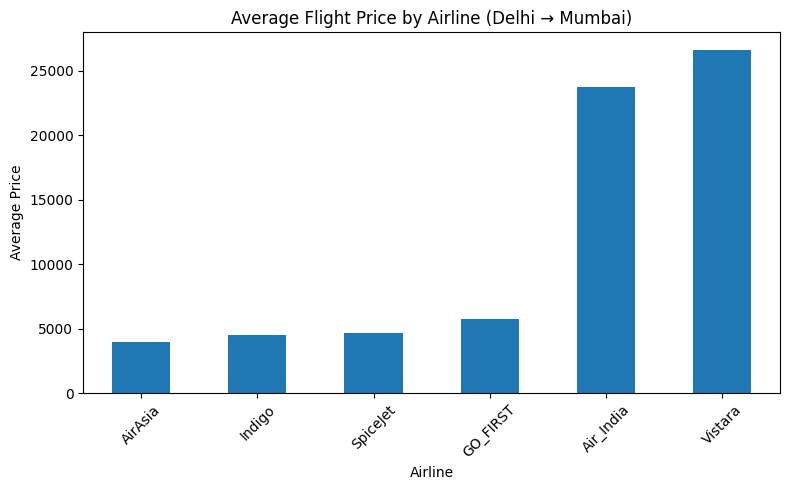

In [ ]:
route_df = df[
    (df['source_city'] == 'Delhi') &
    (df['destination_city'] == 'Mumbai')
]

airline_price = (
    route_df.groupby('airline')['price']
    .mean()
    .sort_values()
)

plt.figure(figsize=(8, 5))
airline_price.plot(kind='bar')
plt.title("Average Flight Price by Airline (Delhi → Mumbai)")
plt.xlabel("Airline")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Low-cost airlines (e.g., Indigo, SpiceJet, AirAsia)
- Premium airlines (Vistara, Air India)
- The differences exists because:
  - Cost structure (fuel efficiency, aircraft type)
  - Service level (meals, baggage, comfort)
  - Target customers (budget vs business travelers)
  - Brand positioning

Question 10: HR Analytics Dataset
- a) What factors most strongly correlate with employee attrition? Use visualizations to show key
drivers (e.g., satisfaction, overtime, salary).
- b) Are employees with more projects more likely to leave?
- Dataset: https://github.com/MasteriNeuron/datasets/blob/main/hr_analytics.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/MasteriNeuron/datasets/main/hr_analytics.csv")
# Correlation with attrition
corr = df.corr(numeric_only=True)['left'].sort_values(ascending=False)
print(corr)


left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64


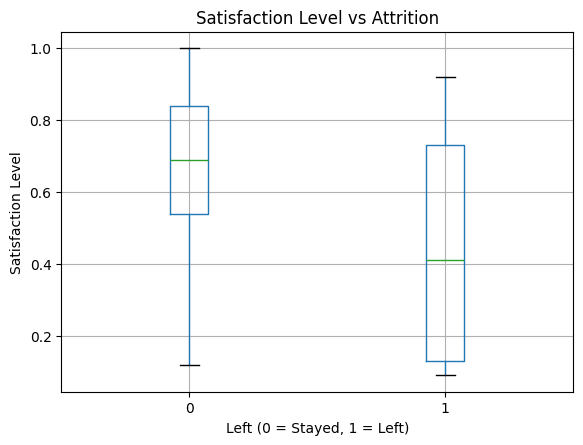

In [ ]:
# Satisfaction vs Attrition
df.boxplot(column='satisfaction_level', by='left')
plt.title("Satisfaction Level vs Attrition")
plt.suptitle("")
plt.xlabel("Left (0 = Stayed, 1 = Left)")
plt.ylabel("Satisfaction Level")
plt.show()

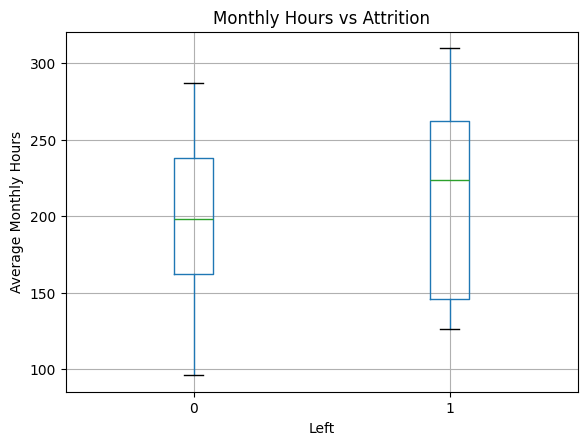

In [ ]:
# Overtime Proxy (Monthly Hours) vs Attrition
df.boxplot(column='average_montly_hours', by='left')
plt.title("Monthly Hours vs Attrition")
plt.suptitle("")
plt.xlabel("Left")
plt.ylabel("Average Monthly Hours")
plt.show()

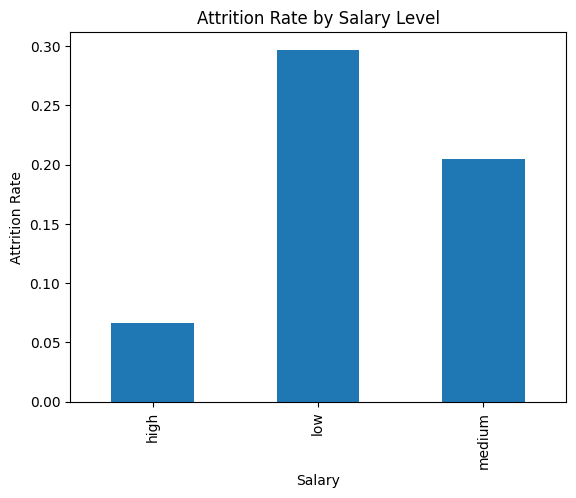

In [ ]:
# Salary Level vs Attrition
df.groupby('salary')['left'].mean().plot(kind='bar')
plt.title("Attrition Rate by Salary Level")
plt.xlabel("Salary")
plt.ylabel("Attrition Rate")
plt.show()

- Strong drivers of attrition:
  - Low satisfaction level
  - High average monthly hours
  - Low salary

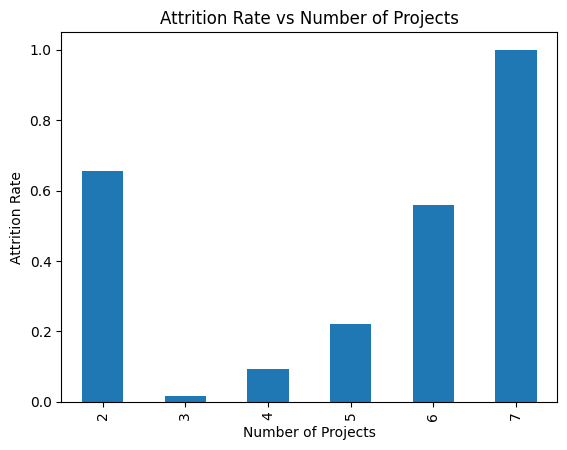

In [ ]:
df.groupby('number_project')['left'].mean().plot(kind='bar')
plt.title("Attrition Rate vs Number of Projects")
plt.xlabel("Number of Projects")
plt.ylabel("Attrition Rate")
plt.show()

- Number of Projects vs Attrition
  - Employees with 2 projects = High attrition (underutilized)
  - Employees with 6–7 projects = High attrition (overworked)
  - Employees with 3–5 projects = Lowest attrition
  - Attrition is highest at extremes - employees with too few or too many projects are more likely to leave, while a moderate workload retains employees better.